In [123]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [124]:
import face_recognition
import os
import numpy as np
from PIL import Image

%matplotlib inline
import matplotlib.pyplot as plt
import shutil # 에러나는 파일 옮기기 위함.

# Step 1. 사진 모으기

### 1. 내 사진 찍기

- 내 사진들 끼리 얼굴 임베딩 벡터거리 구하기

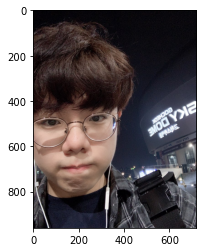

In [125]:
# 사진 출력

me2 = plt.imread('./images/me2.jpg')
plt.imshow(me2)

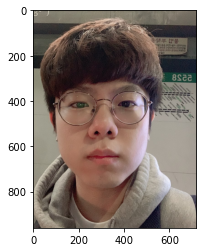

In [126]:
me3 = plt.imread('./images/me3.jpg')
plt.imshow(me3)

In [127]:
# 얼굴영역 추출 -> 임베딩 벡터 추출 -> 거리 비교

image = face_recognition.load_image_file('./me2.jpg')
me2_face_locations = face_recognition.face_locations(image)

a, b, c, d = me2_face_locations[0]
me2_cropped_face = image[a:c,d:b,:]

# plt.imshow(me2_cropped_face)
# me2_cropped_face
me2_embedding = face_recognition.face_encodings(me2_cropped_face)
# me2_embedding

In [128]:
image = face_recognition.load_image_file('./me3.jpg')
me3_face_locations = face_recognition.face_locations(image)

a, b, c, d = me3_face_locations[0]
me3_cropped_face = image[a:c,d:b,:]

# plt.imshow(me3_cropped_face)
# me2_cropped_face
me3_embedding = face_recognition.face_encodings(me3_cropped_face)
# me3_embedding

In [129]:
distances = np.linalg.norm(np.array(me2_embedding) - np.array(me3_embedding), axis=1, ord=2)
print("제 얼굴끼리 비교한 거리값은 ", distances)

제 얼굴끼리 비교한 거리값은  [0.32134543]


### 2. 비교할 연예인 사진 모으기

In [130]:
dir_path = os.getenv('HOME') + '/Project/[Pr.7] Face_Embedding/images'
file_list = os.listdir(dir_path)

for file in file_list:
    print(file)

줄리엔강.png
찬열.jpeg
송영규.jpeg
이시언.jpeg
박정학.jpeg
b1a4진영.jpeg
리아.jpg
심지호.jpeg
고주원.jpeg
김홍파.jpeg
박진우_83.jpeg
홍구.jpg
trump.jpg
이광기.jpeg
신정근.jpeg
신동엽.jpg
곽시양.jpeg
송중기.jpeg
성동일.jpeg
박보검.jpeg
박철민.jpeg
박동빈.jpeg
변우민.jpeg
김영삼.jpeg
김서하.jpeg
기주봉.jpeg
슈퍼비.jpeg
잭 블랙.jpeg
서영주.jpeg
하승진.jpg
변희봉.jpeg
이대호.jpeg
윤희석.jpeg
이완.jpeg
박주형.jpeg
박중훈.jpeg
박건우.png
이규한.jpeg
아이즈원김채원.jpg
크리스 햄스워스.jpg
스윙스.jpeg
노홍철.jpeg
이경영.jpeg
서현철.png
손창민.jpeg
김석훈.jpeg
김병세.jpeg
이문식.png
이명박.jpg
박찬욱.jpeg
크리스탈.jpg
오한결.jpeg
심희섭.jpeg
박성훈.jpeg
아이즈원조유리.jpeg
김상호.jpeg
장원영.jpeg
백도빈.jpeg
박윤재.jpeg
피어스 브로스넌.jpg
윤균상.jpg
강석우.jpeg
이재백.jpeg
류승범.jpeg
김영재.jpeg
곽희성.jpeg
서배준.png
성혁.jpeg
고창석.jpeg
박은석.jpeg
서지석.jpeg
손우현.jpeg
연준석.jpeg
슬리피.jpg
기성용.jpg
트와이스미나.jpg
김이안.jpeg
노주현.jpeg
김민상.jpeg
김진엽.png
곽정욱.jpeg
김희라.png
고우림.jpeg
김대중.jpg
이철민.jpeg
온앤오프라운.jpg
김진우.jpeg
안도규.jpeg
트와이스쯔위.jpg
김명민.jpeg
조이.jpg
김현중.jpeg
박건형.jpeg
박휘순.jpg
이서진.jpeg
벤 에플렉.jpeg
백윤식.png
김형민.jpeg
류현진.jpg
여자아이들수진.jpeg
윤경신.jpg
이정신.jpeg
개리.jpg
me2.jpg
김성균.jpeg
이상엽.jpeg
유태웅.jpeg
김형준.gif
강지섭.jpeg
옥냥이.jpeg
김정민.j

In [131]:
print(len(file_list), "명의 연예인 사진이 준비되었습니다.")

700 명의 연예인 사진이 준비되었습니다.


# Step 2. 얼굴 영역 자르기

In [132]:
def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

In [133]:
print(os.getenv('HOME') + '/Project/[Pr.7] Face_Embedding/images')

/home/ssac2/Project/[Pr.7] Face_Embedding/images


- 나중에 웹 서비스로 활용할 때 필요한 gropped_face 부분만 추출

In [134]:
# dir_path = './images'
dir_path = os.getenv('HOME') + '/Project/[Pr.7] Face_Embedding/images'
file_list = os.listdir(dir_path)

# print(file_list)

for file in file_list:    
    face = get_gropped_face(dir_path + "/" + file)
    pillow_image = Image.fromarray(face)
    pillow_image.save(os.getenv('HOME') + '/Project/[Pr.7] Face_Embedding/gropped_image/' + file)
    

# Step 3. 얼굴 영역의 임베딩 추출하기

In [135]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [136]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    num = 0
    for file in file_list:
        try: 
            img_path = os.path.join(dir_path, file)
            face = get_gropped_face(img_path)
            embedding = get_face_embedding(face)

            if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                                  # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        except:
            print(file)
            num += 1
            shutil.move(dir_path +'/'+ file, './error/' + file)
            
    print(num,"개의 오류 파일을 검출하였습니다.")

    return embedding_dict

In [137]:
embedding_dir_path = os.getenv('HOME') + '/Project/[Pr.7] Face_Embedding/images'

In [138]:
embedding_dict = get_face_embedding_dict(embedding_dir_path)

0 개의 오류 파일을 검출하였습니다.


In [139]:
embedding_dict

{'줄리엔강': array([-0.08302452,  0.08357994,  0.06858191,  0.01095718, -0.06582478,
         0.02666525, -0.09147002, -0.06651732,  0.15020648, -0.01657212,
         0.23625067,  0.03458444, -0.19337764, -0.02739554, -0.06280125,
         0.10338838, -0.1515429 , -0.13256833, -0.04817004, -0.06887508,
         0.1143717 , -0.00159833, -0.06250076,  0.0379172 , -0.21624905,
        -0.16404727, -0.08824032, -0.08368705,  0.08637781, -0.14810295,
        -0.05250318, -0.01610551, -0.17114696, -0.04871547,  0.02790657,
         0.08301675,  0.04125442, -0.0542759 ,  0.18668669, -0.02150101,
        -0.12841654,  0.05555278, -0.01074169,  0.23847012,  0.19715007,
         0.00150167,  0.02791655, -0.05665649,  0.1256168 , -0.23390514,
         0.13895658,  0.14720498,  0.17514268,  0.1060009 ,  0.08824489,
        -0.21337678, -0.03528893,  0.1837257 , -0.13952444,  0.08549284,
        -0.02138495, -0.04324929,  0.04322607, -0.04394064,  0.12892339,
         0.12081359, -0.08731195, -0.182366

# Step 4. 모은 연예인들과 비교하기

In [140]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [141]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [142]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [143]:
sort_key_func= get_nearest_face('me2')
# sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

순위 1 : 이름(me3), 거리(0.32134542720342274)
순위 2 : 이름(오한결), 거리(0.43146705505467114)
순위 3 : 이름(임원희), 거리(0.4512857300572335)
순위 4 : 이름(손예진), 거리(0.45581752750040816)
순위 5 : 이름(이수완), 거리(0.4561673756481726)


- 내 사진이 가장 거리가 가까운 것을 확인!

# Step 5. 다양한 재미있는 시각화 시도해보기

- 오한결

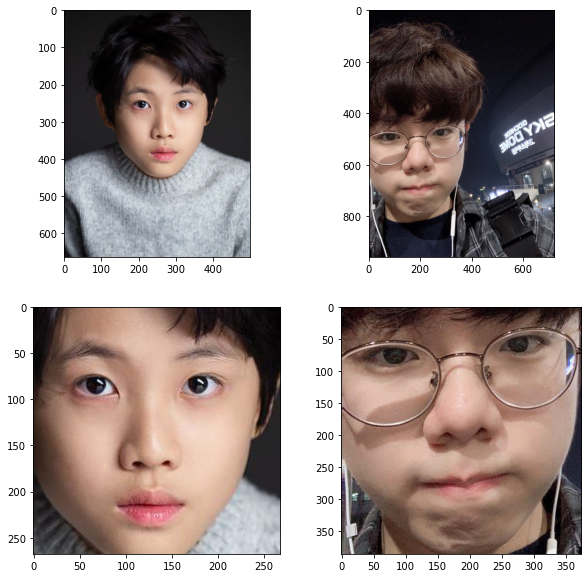

당신 얼굴과의 임베딩 거리 :  0.43146705505467114
어때요, 닮았나요?


In [162]:
oh = plt.imread('./images/오한결.jpeg')
me2 = plt.imread('./images/me2.jpg')

oh_embed = plt.imread('./gropped_image/오한결.jpeg')
me2_embed = plt.imread('./gropped_image/me2.jpg')

f = plt.figure(figsize=(10, 10))
oh_pic = f.add_subplot(221)
plt.imshow(oh)

plt.subplot(2, 2, 2)
plt.imshow(me2)

plt.subplot(2, 2, 3)
plt.imshow(oh_embed)

plt.subplot(2, 2, 4)
plt.imshow(me2_embed)

plt.show()

print("당신 얼굴과의 임베딩 거리 : ", get_distance('오한결', 'me2'))

if get_distance('오한결', 'me2') < 0.5:
    print("어때요, 닮았나요?")
else:
    print("흠..")

- 임원희

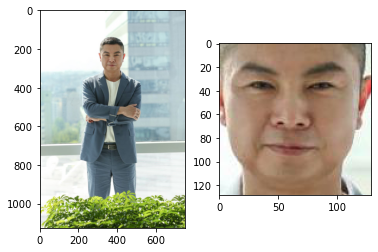

In [169]:
im = plt.imread('./images/임원희.jpeg')
im_embed = plt.imread('./gropped_image/임원희.jpeg')

plt.subplot(1, 2, 1)
plt.imshow(im)

plt.subplot(1, 2, 2)
plt.imshow(im_embed)

- 손예진

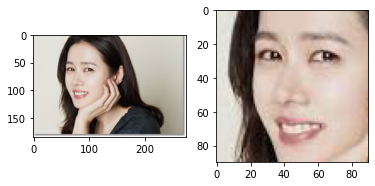

In [170]:
son = plt.imread('./images/손예진.jpeg')
son_embed = plt.imread('./gropped_image/손예진.jpeg')

plt.subplot(1, 2, 1)
plt.imshow(son)

plt.subplot(1, 2, 2)
plt.imshow(son_embed)

- 이수완

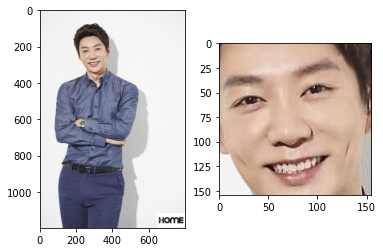

In [171]:
su = plt.imread('./images/이수완.jpeg')
su_embed = plt.imread('./gropped_image/이수완.jpeg')

plt.subplot(1, 2, 1)
plt.imshow(su)

plt.subplot(1, 2, 2)
plt.imshow(su_embed)

# 회고

### - 이번 프로젝트에서 어려웠던 점.
    크게 어려웠던 부분은 없었지만, 사진을 수집하는 과정에서 얼굴 landmark를 제대로 추출하지 못하는 사진들이 몇 개 존재하였습니다. 이 부분을 따로 필터하는 과정을 넣어주었습니다.
    
    
### - 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점.
    landmark 사이의 거리를 통해 얼굴이 닮은 지 여부를 판단하는 방법을 사용하였는데, 결과물이 생각보다는 만족스럽지는 못한 것 같습니다. (개인적으로 닮았다고 생각하는 캐스터? 분의 사진을 추가해서 이 분이 나오는지 확인해봤지만 어림도 없었습니다 ㅎㅎ)
    
    성능을 좋게 만들기 위해서는 단순히 거리만의 계산 외에도 다른 방법이 추가되어야 할 것 같습니다.
    
    
### - 루브릭 평가 지표를 맞추기 위해 시도한 것들.
    1) 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있다. (닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트가 정렬되어 출력되었는가?)
    
        네. 임베딩 벡터를 활용해 제 얼굴과 가장 거리가 짧은 5명의 리스트를 출력해서 각각의 임베딩 거리의 차를 표시하였습니다.
        
        
    2) 충분한 수의 이미지에 대한 시도를 통해 매우 닮은꼴의 연예인을 찾아냈다. (다양한 탐색을 통해 본인과 임베딩 거리 0.5 이내로 닮은 연예인을 찾아내었는가?)
    
        음.. 충분한 수의 이미지로 시도한 것은 맞습니다. 임베딩 거리도 0.5 이내로 닮은 연예인을 찾은 것도 맞지만, 개인적으로는 성능에 대해 만족하지는 않습니다. (많이 닮은지 잘 모르겠음.)
        
        
    3) 다양하고 재미있는 결과 시각화를 시도하였다. (matplotlib 등 다양한 시각화 도구를 하나 이상 이용해 재미있는 결과 시각화를 구현하였는가?)
    
        matplotlib를 활용해서 닮은 꼴 Best5의 사진을 따로 그려보았고, gropped 이미지를 따로 관리하여 얼굴 부분만 그릴 수 있도록 하였습니다.
    
    